iter 0: cur_l=282.8038827092715
iter 1: cur_l=282.8038827092715
iter 2: cur_l=274.3936369190884
iter 3: cur_l=268.71928145164884
iter 4: cur_l=268.71928145164884
iter 5: cur_l=268.71928145164884
iter 6: cur_l=268.71928145164884
iter 7: cur_l=268.71928145164884
iter 8: cur_l=268.71928145164884
iter 9: cur_l=268.71928145164884


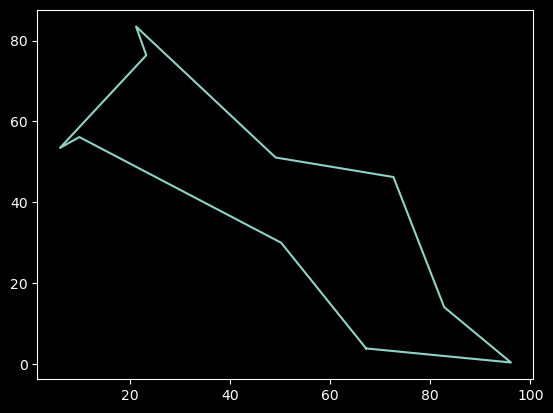

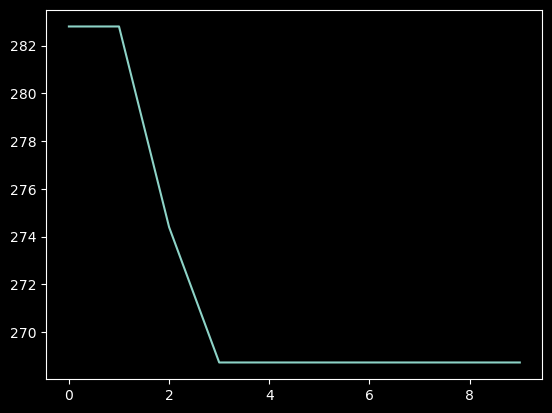

In [3]:
# 遗传算法

# 导入必要的模块
import random
from util import *  # 假设 util 模块中包含了 calc 和 plot_ans 等函数
import matplotlib.pyplot as plt
import json  # 用于读取 JSON 文件

# 读取点集数据
with open("points.json", "r") as f:
    txt = f.readline()  # 读取文件内容
points = json.loads(txt)  # 将 JSON 格式的内容转换为 Python 对象（通常是列表或字典）

# 初始化参数
N = len(points)  # 点的数量
M = 10  # 每一代种群的大小
p_cross = 1  # 交叉概率（1 表示一定会发生交叉）
p_perm = 0.1  # 变异概率（10% 的概率发生变异）

# 选择函数：根据路径长度对种群进行排序，选择前 M 个路径
def select(population, M, points):
    ranking = []
    for p in population:
        ranking.append((calc(p, points), p))  # 计算每个路径的长度，并将长度和路径作为一个元组存入 ranking
    ranking.sort()  # 按照路径长度从小到大排序
    ans = [t[1] for t in ranking[:M]]  # 提取前 M 个路径
    return ans

# 变异函数：随机选择路径中的两个点，将这两点之间的部分反转
def perm(route):
    i = random.randint(1, N - 1)  # 随机选择一个起始点
    j = random.randint(1, N - 1)  # 随机选择一个结束点
    if i > j:  # 确保 i < j
        i, j = j, i
    route = route[:i] + route[j:i - 1:-1] + route[j + 1:]  # 反转 i 和 j 之间的部分
    return route

# 交叉函数：将两条路径进行部分交叉，生成两条新的路径
def cross(r1, r2):
    i = random.randint(1, N - 1)  # 随机选择一个起始点
    j = random.randint(1, N - 1)  # 随机选择一个结束点
    if i > j:  # 确保 i < j
        i, j = j, i
    takeout = r1[i:j + 1]  # 从 r1 中取出 i 到 j 的部分
    takein = []  # 用于存储 r2 中与 takeout 相同的部分
    r1_tmp = r1[:i] + r1[j + 1:]  # r1 剩余的部分
    r2_tmp = []  # r2 剩余的部分
    for k in r2:
        if k in takeout:
            takein.append(k)  # 如果 r2 中的点在 takeout 中，则加入 takein
        else:
            r2_tmp.append(k)  # 否则加入 r2 的剩余部分
    r1_tmp = r1_tmp + takein  # 将 takein 加入 r1 的剩余部分
    r2_tmp = r2_tmp + takeout  # 将 takeout 加入 r2 的剩余部分
    return r1_tmp, r2_tmp

# 初始化种群
population = []
for _ in range(M * 10):  # 初始种群大小为 M*10
    ls = list(range(N))  # 生成一个包含所有点的列表
    random.shuffle(ls)  # 随机打乱顺序
    population.append(ls)  # 将打乱后的路径加入种群
population = select(population, M, points)  # 选择前 M 个路径作为初始种群

# 迭代过程
rec = []  # 用于记录每一代的最佳路径长度
for iter in range(10):  # 进行 10 代迭代
    new_gen = []  # 新一代种群
    for p in population:
        new_gen.append(p)  # 将当前种群中的路径加入新一代种群
    # 交配
    for p1 in population:
        for p2 in population:
            if random.random() < p_cross:  # 如果随机数小于交叉概率
                n1, n2 = cross(p1, p2)  # 对 p1 和 p2 进行交叉
                new_gen.append(n1)  # 将新生成的路径加入新一代种群
                new_gen.append(n2)
    # 变异
    for p in new_gen:
        if random.random() < p_perm:  # 如果随机数小于变异概率
            p = perm(p)  # 对路径进行变异
    # 选择
    population = select(new_gen, M, points)  # 从新一代种群中选择前 M 个路径
    best = calc(population[0], points)  # 计算当前最佳路径的长度
    print("iter {}: cur_l={}".format(iter, best))  # 打印当前代的最佳路径长度
    rec.append(best)  # 将当前代的最佳路径长度加入记录列表

# 输出结果
ans = population[0]  # 最终的最佳路径
plot_ans(ans, points)  # 绘制最佳路径的图形
plt.plot(rec)  # 绘制每一代最佳路径长度的变化曲线
plt.show()  # 显示图形